<a href="https://colab.research.google.com/github/reiple/ds2_cv_hw/blob/main/DS_CV_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Due: 2023/08/15 (23:59 KST)** \
Please submit your notebook file to **ininin0516@snu.ac.kr**\
(파일 - 다운로드 - .ipynb 다운로드 를 눌러서 다운로드 받으시고 제출해주시면 감사하겠습니다.)
\
\
We would appreciate it if you followed the given email form. However, any filename or email title is also acceptable, as long as we can identify your name. \
file-name: DS2_HW2_홍길동.ipynb \
email-Title: **[SamsungDS2] CV-HW2 홍길동**


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist
import cv2

In [2]:
import gdown
url = "https://drive.google.com/drive/folders/1QhOoHnoqzIX0R3-u2sT05XMqQU3jwwks?usp=share_link"
gdown.download_folder(url, quiet=True)
%cd hw2

/content/hw2


# Homework 2

이번 과제는 SIFT feature를 추출하고, 매칭하는 과정을 통해 homography를 구하여 여러 장의 연속적인 이미지를 하나의 파노라마로 만드는 내용입니다. 구현이 잘 되었다면 노트북 하단부의 실행 블록에서 아래와 같은 이미지를 확인할 수 있을 것입니다. (위의 폴더 다운로드 블록을 실행한 뒤 아래 블록을 실행하시기 바랍니다)


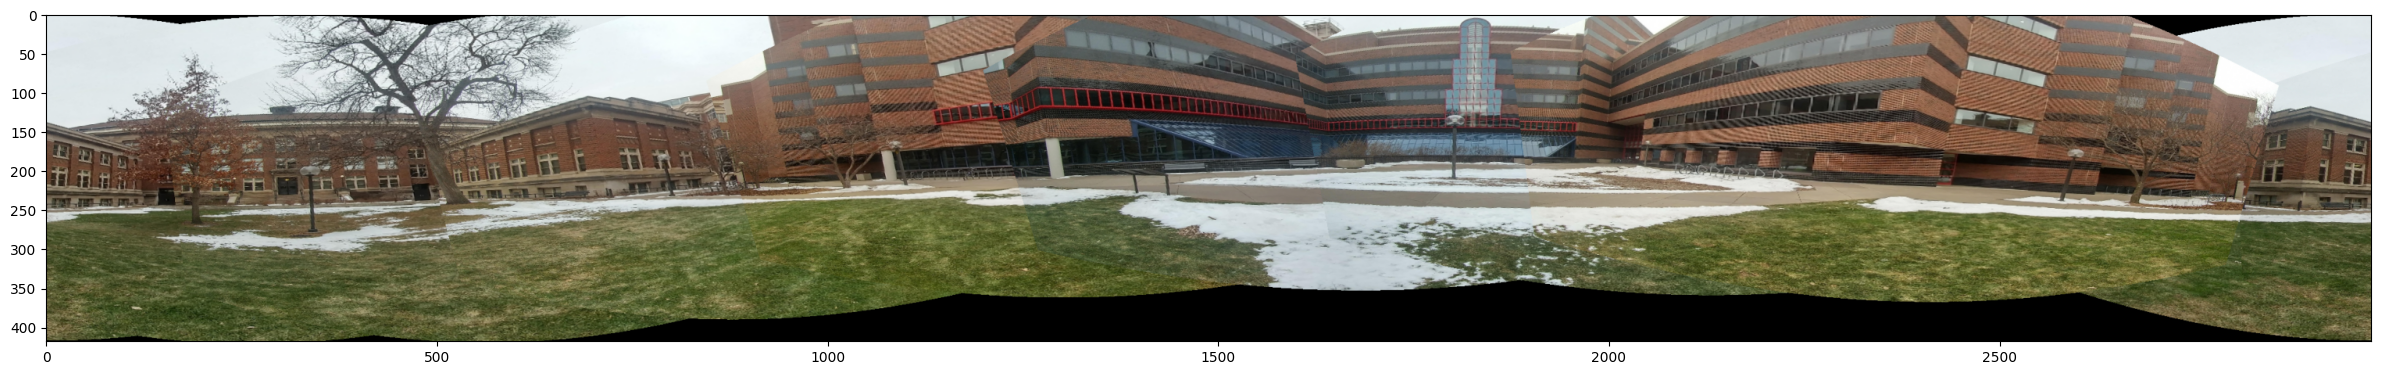

In [ ]:
expected = cv2.cvtColor(cv2.imread("/content/hw2/expected.png"), cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(30, 6))
ax.imshow(expected)

# Overview
이번 과제의 구조는 크게 네 블록으로 구성되어 있습니다
1. 이미지들 사이의 SIFT feature를 matching 시킴
2. Matching keypoint 사이의 homography를 구함
3. Homography를 이용하여 rotation을 구함
4. Rotation을 이용하여 이미지들을 하나의 canvas 위에 올림

여기서 4번은 이미 구현이 되어 있고, 1번부터 3번까지를 구현하는 것이 과제의 목표입니다.


# 1. SIFT matching

 먼저 SIFT keypoint와 descriptor를 추출한 뒤 matching하는 메서드를 구현할 것입니다. SIFT 실습 때 opencv에 구현된 nearest neighbor를 사용하여 매칭을 구한 것 처럼 scikit-learn의 nearest neighbor를 사용할 것입니다(상단의 import를 참고하시기 바랍니다). 전체적인 과정은 실습때 진행했던 것과 같습니다. 실습 때 distance ratio로 thresholding을 해주었는데, 이번 과제에서 설정할 threshold ratio는 0.7 입니다.

 *Hint*
 *아래의 문서를 참고하시기 바랍니다*

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [ ]:
def MatchSIFT(loc1, des1, loc2, des2):
  """
  Find the matches of SIFT features between two images

  Parameters
  ----------
  loc1 : ndarray of shape (n1, 2)
      Keypoint locations in image 1
  des1 : ndarray of shape (n1, 128)
      SIFT descriptors of the keypoints image 1
  loc2 : ndarray of shape (n2, 2)
      Keypoint locations in image 2
  des2 : ndarray of shape (n2, 128)
      SIFT descriptors of the keypoints image 2

  Returns
  -------
  x1 : ndarray of shape (n, 2)
      Matched keypoint locations in image 1
  x2 : ndarray of shape (n, 2)
      Matched keypoint locations in image 2
  """
  return



In [ ]:
# 테스트
loc1 = [[0, 0], [1, 1]]
loc2 = [[10, 10], [11, 11]]

neigh = NearestNeighbors(n_neighbors=2, radius=0.7).fit(loc1)

In [ ]:
distance, index = neigh.kneighbors(loc2)
print("distance:" , distance)
print("index: ", index)

distance: [[12.72792206 14.14213562]
 [14.14213562 15.55634919]]
index:  [[1 0]
 [1 0]]


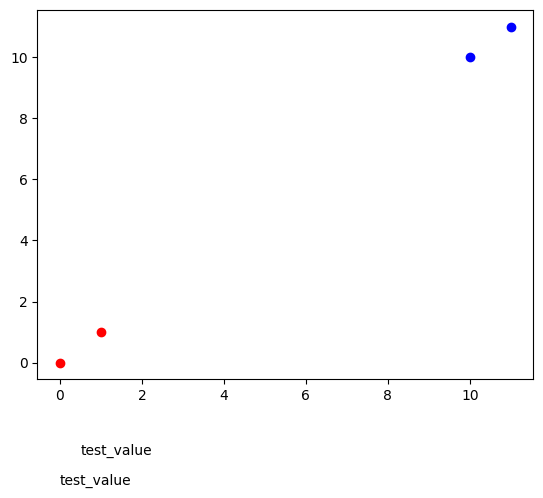

In [ ]:
import matplotlib.pyplot as plt

for ind, loc in enumerate(loc1):
  plt.scatter(loc[0], loc[1], color='r')
  plt.text(loc[0] / 2, loc[1] - 4, 'test_value')

for ind, loc in enumerate(loc2):
  plt.scatter(loc[0], loc[1], color='b')

plt.show()

In [ ]:
matches.kneighbors(loc2, n_neighbors=2, return_distance=True)

(array([[12.72792206, 14.14213562],
        [14.14213562, 15.55634919]]),
 array([[1, 0],
        [1, 0]]))

## 1.2 cv2로 해 보기

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests

img1 = Image.open('/content/hw2/1.jpg')
img2 = Image.open('/content/hw2/2.jpg')

img1 = np.array(img1)
img2 = np.array(img2)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Nearest neighbor search 특화 matcher를 사용
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
# 근접한 descriptor들 중 k개만큼의 매칭 포인트들을 찾음
matches = flann.knnMatch(des1,des2,k=2)

In [ ]:
good = []

# matching들이 query distance(n.distance)의 threashold 0.7 안쪽에 있는 경우 좋은 matching이라고 생각
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [ ]:
print(m)
print(n)

< cv2.DMatch 0x7c79bca5b870>
< cv2.DMatch 0x7c79bca5b0b0>


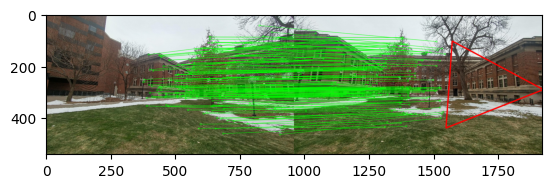

(<matplotlib.image.AxesImage at 0x7c79bcb9e6e0>, None)

In [ ]:
# 대응되는 점으로 나온 것이 10개 이상인 경우, homography 구함
if len(good)>10:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    # 대응점 사이의 변환을 구함
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    # 템플릿의 사각형 경계를 변환 M을 이용해 촬영된 이미지로 옮김
    h,w,_ = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    # 대응점 간의 선을 그음
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)


draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

# Draw matches
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

## 1.3 매칭점 찾기

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img1 = Image.open('/content/hw2/1.jpg')
img2 = Image.open('/content/hw2/2.jpg')

img1 = np.array(img1)
img2 = np.array(img2)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


# point를 직접 numpy array로 변환하고 싶으면 아래와 같이 변환해주기도 함.
loc1 = np.array(list(map(lambda v : [v.pt[0], v.pt[1]], kp1)))
loc2 = np.array(list(map(lambda v : [v.pt[0], v.pt[1]], kp2)))

loc1_x = np.array(list(map(lambda v : v.pt[0], kp1)))
loc1_y = np.array(list(map(lambda v : v.pt[1], kp1)))
loc2_x = np.array(list(map(lambda v : v.pt[0], kp2)))
loc2_y = np.array(list(map(lambda v : v.pt[1], kp2)))

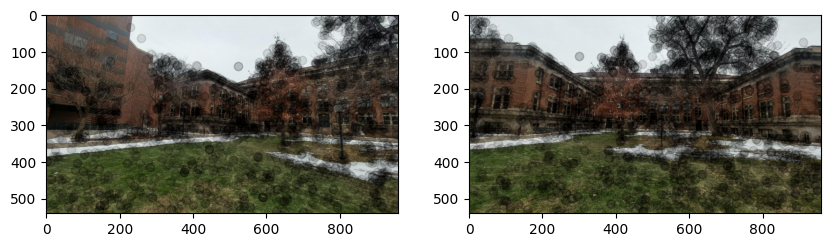

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img1)
ax1.scatter(loc1_x, loc1_y, color='k', alpha=0.1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img2)
ax2.scatter(loc2_x, loc2_y, color='k', alpha=0.1)

plt.show()

### 1.3.1 des1, des2를 이용하여 NearestNeighbors 구하기

In [ ]:
print(des1[0])

[  6.   3.   5.  49.  26.  27.  18.  34.  11.   3.   5.  26.  13.   6.
  25.  60.  36.   9.   8.  20.   9.  10.  46.  47.  51.   4.   4.   2.
   0.   1.  40. 147.   1.   0.   1.  42.  13.   0.  28.  72.  16.  15.
  27. 147.  68.   2.  22.  42. 147.  88.  36.  73.   7.   1.   9.  75.
 100.  22.   8.  14.  29.   7.  38.  71.   0.   0.   0.  21.   8.   0.
   1.   1.  23.   3.   3. 113.  69.   6.  27. 116. 147.  18.   7.  24.
   7.   2.  10. 147.  57.  39.  72.  53.  24.   3.   2.  20.   0.   0.
   0.   0.   0.   0.   0.   0.   8.   0.   0.   0.   0.   0.   2.  35.
  40.   1.  46.  74.   4.   0.   1.  77.   9.  39.  74.  87.   6.   0.
   0.   2.]


In [ ]:

if des1.shape[0] > des2.shape[0]:
  nn = NearestNeighbors(n_neighbors=2, radius=0.7).fit(des2)
  distances, indices = nn.kneighbors(des1)
else:
  nn = NearestNeighbors(n_neighbors=2, radius=0.7).fit(des1)
  distances, indices = nn.kneighbors(des2)

if des1.shape[0] > des2.shape[0]:
  print('des2 is fitted')
else:
  print('des1 is fitted')

des1 is fitted


0
2
4
6


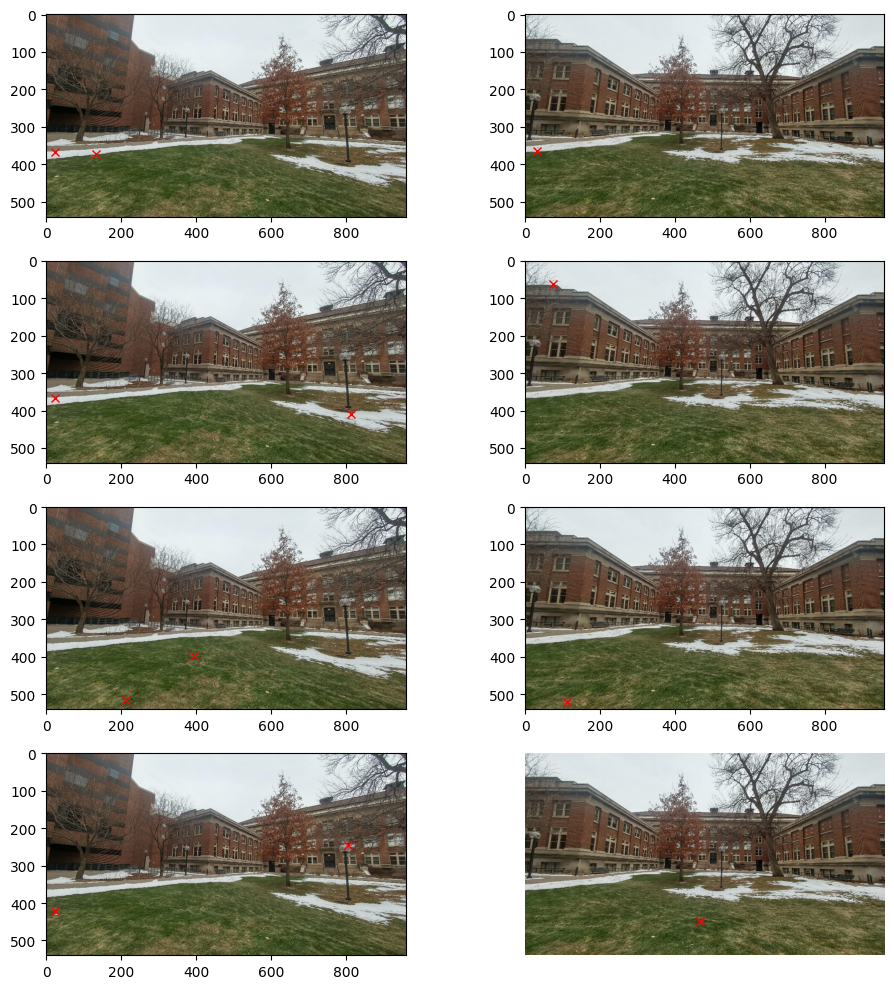

In [ ]:
fig = plt.figure(figsize=(10, 10))

axes = []
max_plot = 4
for i in range(1, 2 * max_plot + 1, 2):
  ax1 = fig.add_subplot(max_plot, 2, i)
  ax1.imshow(img1)
  ax2 = fig.add_subplot(max_plot, 2, i + 1)
  ax2.imshow(img2)
  axes.append(ax1)
  axes.append(ax2)


targets = [100, 200, 300, 1200]
target_colors = ['r', 'r', 'r', 'r']

for i in range(0, 2 * max_plot, 2):
  print(i)
  target = targets[i // 2]
  target_color = target_colors[i // 2]
  target_ind = indices[target]
  axes[i].plot(loc1[target_ind[0], 0], loc1[target_ind[0], 1], color=target_color, marker='x')
  axes[i].plot(loc1[target_ind[1], 0], loc1[target_ind[1], 1], color=target_color, marker='x')
  axes[i + 1].plot(loc2[target, 0], loc2[target, 1], color=target_color, marker='x')

plt.tight_layout()
plt.axis('off')
plt.show()

### 1.3.2 함수 구현

In [ ]:
# def MatchSIFT(loc1, des1, loc2, des2):
#   """
#   Find the matches of SIFT features between two images

#   Parameters
#   ----------
#   loc1 : ndarray of shape (n1, 2)
#       Keypoint locations in image 1
#   des1 : ndarray of shape (n1, 128)
#       SIFT descriptors of the keypoints image 1
#   loc2 : ndarray of shape (n2, 2)
#       Keypoint locations in image 2
#   des2 : ndarray of shape (n2, 128)
#       SIFT descriptors of the keypoints image 2

#   Returns
#   -------
#   x1 : ndarray of shape (n, 2)
#       Matched keypoint locations in image 1
#   x2 : ndarray of shape (n, 2)
#       Matched keypoint locations in image 2
#   """

#   # des1, des2 중 더 작은 개수가 있는 것을 기준으로 찾는다.
#   n = 0
#   if des1.shape[0] < des2.shape[0]:
#     target_fit = des1
#     target_test = des2
#     loc_fit = loc1
#     loc_test = loc2
#     n = des1.shape[0]
#   else:
#     target_fit = des2
#     target_test = des1
#     loc_fit = loc2
#     loc_test = loc1
#     n = des2.shape[1]

#   nn = NearestNeighbors(n_neighbors=2, radius=0.7).fit(target_fit)
#   distances, indices = nn.kneighbors(target_test)

#   x1 = np.ndarray([n, 2])
#   x2 = np.ndarray([n, 2])
#   index = 0
#   if des1.shape[0] < des2.shape[0]:
#     for ind in indices:
#       x1 = np.append(x1, [loc1[ind[0], 0], loc1[ind[0], 1]])
#       x2 = np.append(x2, [loc2[index, 0], loc2[index, 1]])
#       index += 1
#   else:
#     for ind in indices:
#       x1 = np.append(x1, [loc1[index, 0], loc1[index, 1]])
#       x2 = np.append(x2, [loc2[ind[0], 0], loc2[ind[0], 1]])
#       index += 1

#   fig = plt.figure(figsize=(10, 10))

#   axes = []
#   max_plot = 4
#   for i in range(1, 2 * max_plot + 1, 2):
#     ax1 = fig.add_subplot(max_plot, 2, i)
#     ax2 = fig.add_subplot(max_plot, 2, i + 1)
#     ax1.imshow(img1)
#     ax2.imshow(img2)
#     axes.append(ax1)
#     axes.append(ax2)


#   targets = [100, 200, 300, 1200]
#   for i in range(0, 2 * max_plot, 2):
#     print(i, i//2)
#     target = targets[i // 2]
#     target_color = target_colors[i // 2]
#     target_ind = indices[target]
#     axes[i].plot(x1[target_ind][0], x1[target_ind][1], color='r', marker='x')
#     axes[i + 1].plot(x2[target_ind][0], x2[target_ind][1], color='b', marker='o')

#     # axes[i].scatter(x2[target_ind][0], x2[target_ind][1], color=target_color, marker='o')
#     # axes[i + 1].scatter(loc_test[target_ind][0], loc_test[target_ind][1], color=target_color, marker='x')


#   plt.tight_layout()
#   plt.axis('off')
#   plt.show()

#   return x1, x2

In [ ]:
def MatchSIFT(loc1, des1, loc2, des2):
    """
    Find the matches of SIFT features between two images

    Parameters
    ----------
    loc1 : ndarray of shape (n1, 2)
        Keypoint locations in image 1
    des1 : ndarray of shape (n1, 128)
        SIFT descriptors of the keypoints image 1
    loc2 : ndarray of shape (n2, 2)
        Keypoint locations in image 2
    des2 : ndarray of shape (n2, 128)
        SIFT descriptors of the keypoints image 2

    Returns
    -------
    x1 : ndarray of shape (n, 2)
        Matched keypoint locations in image 1
    x2 : ndarray of shape (n, 2)
        Matched keypoint locations in image 2
    """

    # des1, des2 중 더 작은 개수가 있는 것을 기준으로 찾는다.
    nn = NearestNeighbors(n_neighbors=2, radius=0.7).fit(des1)
    distances, indices = nn.kneighbors(des2)

    if loc1.shape[0] > loc2.shape[0]:
        n = loc2.shape[0]
    else:
        n = loc1.shape[0]

    x1 = np.ndarray([n, 2])
    x2 = np.ndarray([n, 2])
    index = 0
    for ind in indices:
        x1 = np.append(x1, [loc1[ind[0], 0], loc1[ind[0], 1]])
        x2 = np.append(x2, [loc2[index, 0], loc2[index, 1]])
        index += 1

    return x1, x2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img1 = Image.open('/content/hw2/1.jpg')
img2 = Image.open('/content/hw2/2.jpg')

img1 = np.array(img1)
img2 = np.array(img2)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


# point를 직접 numpy array로 변환하고 싶으면 아래와 같이 변환해주기도 함.
loc1 = np.array(list(map(lambda v : [v.pt[0], v.pt[1]], kp1)))
loc2 = np.array(list(map(lambda v : [v.pt[0], v.pt[1]], kp2)))

matches = MatchSIFT(loc1, des1, loc2, des2)

## 1.4 구현

In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def MatchSIFT(loc1, des1, loc2, des2):
    """
    Find the matches of SIFT features between two images

    Parameters
    ----------
    loc1 : ndarray of shape (n1, 2)
        Keypoint locations in image 1
    des1 : ndarray of shape (n1, 128)
        SIFT descriptors of the keypoints image 1
    loc2 : ndarray of shape (n2, 2)
        Keypoint locations in image 2
    des2 : ndarray of shape (n2, 128)
        SIFT descriptors of the keypoints image 2

    Returns
    -------
    x1 : ndarray of shape (n, 2)
        Matched keypoint locations in image 1
    x2 : ndarray of shape (n, 2)
        Matched keypoint locations in image 2
    """

    nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(des2)
    distances, indices = nbrs.kneighbors(des1)

    threshold = 0.7
    match_mask = distances[:, 0] < threshold * distances[:, 1]

    x1 = loc1[match_mask]
    x2 = loc2[indices[match_mask, 0]]

    return x1, x2

# 2. Estimate homography

적절한 matching을 구하였다면, 해당 대응점들을 이용하여 연속적인 이미지들(i번째와 (i+1)번째 사이) 사이의 homography를 구할것입니다. 강의 시간에서 다룬 것 처럼, Homography를 구하는 과정은 아래와 같습니다.

1. Ax = 0 형태로 matrix A를 구성함
2. A에 SVD(np.linalg.svd())를 적용하고 Homography를 구함
3. 구한 homography를 keypoint x1에 적용하여 x2의 공간으로 변환한 뒤 대응점들 사이의 pixel distance(error term으로 사용)를 구함.
4. 각 pixel distance를 ransac_thr와 비교하여 더 작은 범위 안에 있는 index의 갯수를 구함
5. ransac_n_iter 만큼 iteration을 돌며 가장 많은 inlier를 가지고 있는 homography와 그때의 inlier index를 반환

RANSAC의 구체적인 내용은 아래를 참고하시기 바랍니다.

https://en.wikipedia.org/wiki/Random_sample_consensus

https://darkpgmr.tistory.com/61

*Hint*

*scipy의 cdist를 적절히 이용하면 편리하게 거리를 구할 수 있습니다.*
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

In [74]:
import numpy as np
from scipy.spatial.distance import cdist

def compute_homography(src, dst):
  A = []
  for i in range(src.shape[0]):
      x, y = src[i] # 이미지1
      u, v = dst[i] # 이미지2

      # Ax=0에서 A의 식처럼 만들기
      A.extend([
          [-x, -y, -1, 0, 0, 0, u*x, u*y, u],
          [0, 0, 0, -x, -y, -1, v*x, v*y, v]
      ])
  A = np.array(A)

  # SVD로 UD^TV를 구해서 V 마지막 값으로 나누기
  _, _, V = np.linalg.svd(A)
  H = V[-1].reshape(3, 3)
  return H / H[2, 2]

def EstimateH(x1, x2, ransac_n_iter, ransac_thr):
  max_inliers = 0 # inlier 최대값
  best_H = None # H중에 선택된 것
  best_inliers = None # inlier 중에 선택된 것

  for _ in range(ransac_n_iter):

    # 임의의 점을 선택
    indices = np.random.choice(x1.shape[0], 4, replace=False)
    src = x1[indices]
    dst = x2[indices]

    # Homography 계산
    H = compute_homography(src, dst)

    # X1에 적용하여 X2_estimated 만들기
    x1_homogeneous = np.c_[x1, np.ones(x1.shape[0])].T
    x2_estimated = H.dot(x1_homogeneous)
    x2_estimated /= x2_estimated[2]
    x2_estimated = x2_estimated.T[:, :2]

    # x2와 x2_estimated 거리 비교
    distances = cdist(x2, x2_estimated, metric='euclidean').diagonal()
    inliers = np.where(distances < ransac_thr)[0]

    # 개수가 제일 많은 것 찾기
    if len(inliers) > max_inliers:
      max_inliers = len(inliers)
      best_H = H
      best_inliers = inliers

  return best_H, best_inliers

# 3. Estimate rotation matrix
Homography를 구하였다면 rotation을 추출할 것입니다. 제공된 사진들이 pure rotation으로 구성되었기 때문에 아래의 rotation matrix만으로 파노라마를 구성할 수 있습니다.

Image 1에서 Image 2로의 homography H를 생각해보겠습니다. 그렇다면 대응점 $x_1, x_2$ 사이에 아래와 같은 관계가 성립하게 됩니다.
$$x_2 = H x_1$$
한편, 각 camera의 projection을 생각해보면 아래와 같습니다.
$$ P_1 = K [I | 0] $$
$$ P_2 = K [R | 0] = KR [I|0] $$
이를 이용하여 관계식을 구하면 아래와 같습니다.
$$ x_2 = P_2 X = KR [I|0] X = KRK^{-1}K[I|0]X = KRK^{-1}x_1$$

$$ x_2 = KRK^{-1} x_1$$
위에서 본 homography와 같은 구조가 되는 것을 확인할 수 있습니다. 그렇다면 $H=KRK^{-1}$에서 R을 바로 구하면 원하는 rotation R을 바로 구할 수 있을까요? 그렇지 않습니다. 앞서 EstimateH에서 구한 Homography와 $KRK^{-1}$은 upto scale로 같은 것이기 때문에 적절한 scaling을 해주어야 합니다.

 여기서 input으로 받는 H와 저희가 구할 rotation matrix R은 **upto scale로 같은 eigenvalue**를 가지고 있습니다. 즉, 적절한 scale을 찾아서 input H에 적용을 해준 뒤, 강의 시간에 배운 식을 적용한다면 rotation matrix R을 구할 수 있습니다(혹은 SVD를 사용하여 eigenvector를 바로 구하는 방법도 있습니다). 이때 해당 scale은 input H의 determinant를 사용한 값이 될 것입니다.

 마지막으로 Rotation matrix R은 아래의 조건을 만족해야 하는 것을 고려해야합니다.
$$ R^TR = I$$
$$ det(R) = 1 $$

*Hint*
1. 임의의 상수 c를 3x3 행렬 A에 곱하는 경우 행렬식은 아래와 같습니다.

$$
det(cA) = c^3det(A)
$$
따라서 EstimateH로 구한 Homography의 행렬식이 $KRK^{-1}$의 행렬식에 비해 $\mu$ 만큼 더 scale이 되어있다고 가정을 하면, 실제로 EstimateH의 Homography에 적용해야하는 scale이 $\mu$를 이용해 어떻게 계산되어야 할지 생각해보시기 바랍니다.

2. 구한 rotation matrix R은 위의 조건 $R^TR=I$ 와 $det(R)=1$을 만족해야합니다. 하지만 practical하게 정확히 $I$와 1이 나오지는 않으므로 "충분히" 근접한 값이 나온다면 적절한 구현이 되었다고 생각할 수 있습니다.


In [75]:
import numpy as np

def EstimateR(H, K):
  """
  Compute the relative rotation matrix

  Parameters
  ----------
  H : ndarray of shape (3, 3)
      The estimated homography
  K : ndarray of shape (3, 3)
      The camera intrinsic parameters

  Returns
  -------
  R : ndarray of shape (3, 3)
      The relative rotation matrix from image 1 to image 2
  """

  R = np.dot(np.linalg.inv(K), H).dot(K)

  # up-to scale로 같은 것이기 때문에 적절한 scaling을 해야 한다.
  R_determinent = np.linalg.det(R)

  R = R / R_determinent

  return R

아래부터는 구한 rotation과 제공된 intrinsic matrix K를 이용하여 이미지들을 하나의 파노라마 이미지로 합치는 과정입니다. 이미 구현이 되어 있으므로 어떻게 이미지들을 변환시키는지 참고하시기 바랍니다.

In [76]:
def ConstructCylindricalCoord(Wc, Hc, K):
    """
    Generate 3D points on the cylindrical surface

    Parameters
    ----------
    Wc : int
        The width of the canvas
    Hc : int
        The height of the canvas
    K : ndarray of shape (3, 3)
        The camera intrinsic parameters of the source images

    Returns
    -------
    p : ndarray of shape (Hc, Hc, 3)
        The 3D points corresponding to all pixels in the canvas
    """
    p = np.zeros((Hc, Wc, 3))
    x = np.linspace(0,Wc-1, Wc).astype(int)
    y = np.linspace(0,Hc-1, Hc).astype(int)
    X, Y = np.meshgrid(x,y)
    # set as cartesian
    p[Y, X, 0] = K[0,0]*np.sin(2*np.pi*X/Wc) # x
    p[Y, X, 1] = Y-Hc/2 # y
    p[Y, X, 2] = K[0,0]*np.cos(2*np.pi*X/Wc) # z
    return p


def Projection(p, K, R, W, H):
    """
    Project the 3D points to the camera plane

    Parameters
    ----------
    p : ndarray of shape (Hc, Wc, 3)
        A set of 3D points that correspond to every pixel in the canvas image
    K : ndarray of shape (3, 3)
        The camera intrinsic parameters
    R : ndarray of shape (3, 3)
        The rotation matrix
    W : int
        The width of the source image
    H : int
        The height of the source image

    Returns
    -------
    u : ndarray of shape (Hc, Wc, 2)
        The 2D projection of the 3D points
    mask : ndarray of shape (Hc, Wc)
        The corresponding binary mask indicating valid pixels
    """
    Hc, Wc, _ = p.shape
    u = np.zeros((Hc, Wc, 2))
    mask = np.zeros((Hc,Wc))
    cam_mask = np.zeros((Hc,Wc))

    R = np.repeat(R[np.newaxis,:, :], Wc, axis=0)
    R = np.repeat(R[np.newaxis,:,:, :], Hc, axis=0)
    camCoord = np.matmul(R, p[:,:,:,np.newaxis])

    # Are the object points in front of camera?
    indices = np.argwhere((camCoord[:,:,2,0] > 0)) # where we should focus
    indy, indx = indices[:,0], indices[:,1]
    cam_mask[indy, indx] = 1# where cam looks

    # multiply intrinsic
    K_rep = np.repeat(K[np.newaxis,:,:], len(indy), axis=0)
    camCoord = camCoord[indy, indx,:,:]
    imgCoord = np.matmul(K_rep, camCoord)

    # Normalize
    imgCoord = imgCoord / imgCoord[:,2,0][:,None,None]

    # Are the points inside image boundaries?
    finalind = np.argwhere((imgCoord[:,0,0] >= 0) & (imgCoord[:,0,0] < W-1)
                & (imgCoord[:,1,0] >= 0) & (imgCoord[:,1,0] < H-1))


    u[indy[finalind], indx[finalind],0] = imgCoord[finalind,1,0]
    u[indy[finalind], indx[finalind],1] = imgCoord[finalind,0,0]
    mask[indy[finalind], indx[finalind]] = 1

    return u, mask


def WarpImage2Canvas(image_i, u, mask_i):
    """
    Warp the image to the cylindrical canvas

    Parameters
    ----------
    image_i : ndarray of shape (H, W, 3)
        The i-th image with width W and height H
    u : ndarray of shape (Hc, Wc, 2)
        The mapped 2D pixel locations in the source image for pixel transport
    mask_i : ndarray of shape (Hc, Wc)
        The valid pixel indicator

    Returns
    -------
    canvas_i : ndarray of shape (Hc, Wc, 3)
        the canvas image generated by the i-th source image
    """
    Hc, Wc, _  = u.shape
    canvas_i = np.zeros((Hc, Wc, 3))
    x = np.linspace(0,Wc-1, Wc).astype(int)
    y = np.linspace(0,Hc-1, Hc).astype(int)
    X, Y = np.meshgrid(x,y)

    Y_dl = np.floor(u[Y,X,0]).astype(int)
    X_dl = np.floor(u[Y,X,1]).astype(int)
    a, p = u[Y,X,0]-Y_dl,  u[Y,X,1]-X_dl
    b, q = 1-a, 1-p

    down_left = np.multiply(np.repeat(np.multiply(q,b)[:,:,np.newaxis], 3, axis=2), image_i[Y_dl, X_dl,:])
    up_left = np.multiply(np.repeat(np.multiply(q,a)[:,:,np.newaxis], 3, axis=2), image_i[Y_dl+1, X_dl,:])
    down_right = np.multiply(np.repeat(np.multiply(p,b)[:,:,np.newaxis], 3, axis=2),image_i[Y_dl, X_dl+1,:])
    up_right = np.multiply(np.repeat(np.multiply(p,a)[:,:,np.newaxis], 3, axis=2),image_i[Y_dl+1, X_dl+1,:])
    canvas_i = (down_left + up_left + down_right + up_right).astype(np.uint8)

    return canvas_i


def UpdateCanvas(canvas, canvas_i, mask_i):
    """
    Update the canvas with the new warped image

    Parameters
    ----------
    canvas : ndarray of shape (Hc, Wc, 3)
        The previously generated canvas
    canvas_i : ndarray of shape (Hc, Wc, 3)
        The i-th canvas
    mask_i : ndarray of shape (Hc, Wc)
        The mask of the valid pixels on the i-th canvas

    Returns
    -------
    canvas : ndarray of shape (Hc, Wc, 3)
        The updated canvas image
    """
    Y, X = np.where(mask_i==1)
    canvas[Y, X, :] = canvas_i[Y, X, :]

    return canvas

모든 메서드가 적절하게 구현되었다면, 아래의 코드를 실행시켰을때 파노라마가 생성되는 것을 확인할 수 있을 것입니다.

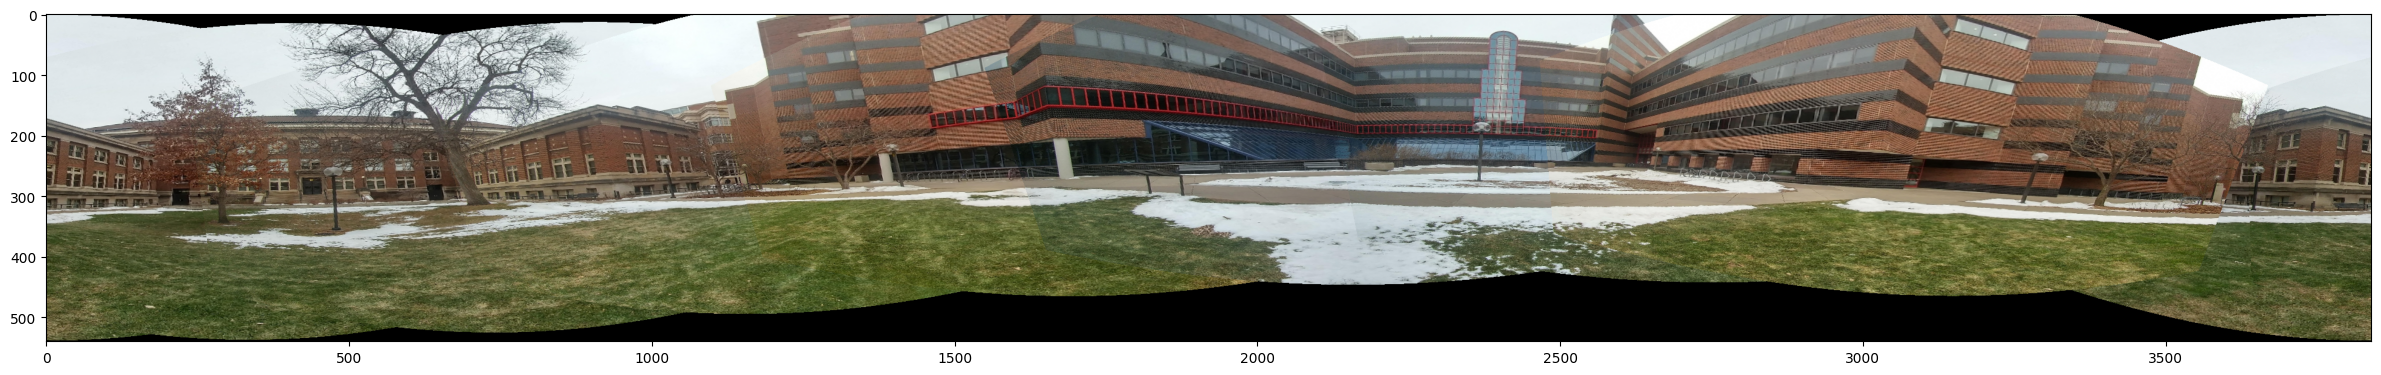

In [77]:
  ransac_n_iter = 500
  ransac_thr = 3
  K = np.asarray([
      [320, 0, 480],
      [0, 320, 270],
      [0, 0, 1]
  ])

  # Read all images
  im_list = []
  for i in range(1, 9):
      im_file = '{}.jpg'.format(i)
      im = cv2.imread(im_file)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      im_list.append(im)

  rot_list = []
  rot_list.append(np.eye(3)) # 처음 rotation matrix을 기준으로 생각
  for i in range(len(im_list) - 1):
      # Load consecutive images I_i and I_{i+1}
      imgFor, imgLat = im_list[i],im_list[i+1]
      # Extract SIFT features
      sift = cv2.SIFT_create() # SIFT object 생성
      loc1, des1 = sift.detectAndCompute(imgFor, None)
      loc2, des2 = sift.detectAndCompute(imgLat, None)
      # Find the matches between two images (x1 <--> x2)
      loc1 = np.array(list(map(lambda v : [v.pt[0], v.pt[1]], loc1)))
      loc2 = np.array(list(map(lambda v : [v.pt[0], v.pt[1]], loc2)))
      x1, x2 = MatchSIFT(loc1, des1, loc2, des2)

      # Estimate the homography between images using RANSAC
      H, inlier = EstimateH(x1, x2, ransac_n_iter, ransac_thr)

      # Compute the relative rotation matrix R
      R = EstimateR(H, K)

      # Compute R_new (or R_i+1)
      R_new = R@rot_list[-1] # 직전 rotation들을 누적
      rot_list.append(R_new)

  Him = im_list[0].shape[0]
  Wim = im_list[0].shape[1]

  Hc = Him
  Wc = len(im_list) * Wim // 2

  canvas = np.zeros((Hc, Wc, 3), dtype=np.uint8)
  p = ConstructCylindricalCoord(Wc, Hc, K)

  for i, (im_i, rot_i) in enumerate(zip(im_list, rot_list)):
      # Project the 3D points to the i-th camera plane
      u, mask_i = Projection(p, K, rot_i, Wim, Him)
      # Warp the image to the cylindrical canvas
      canvas_i = WarpImage2Canvas(im_i, u, mask_i)
      # Update the canvas with the new warped image
      canvas = UpdateCanvas(canvas, canvas_i, mask_i)
  fig, ax = plt.subplots(figsize=(30, 6))
  ax.imshow(canvas)